In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#from matplotlib.font_manager import FontProperties

## <font color=blue>01 Introduction to the data set</font> 
*  Read __imports-85.data__ ([data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names)) into a dataframe named __cars__. If you read in the file using [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) without specifying any additional parameter values, you'll notice that the column names don't match the ones in the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile). Why do you think this is and how can you fix this?
*  Determine which columns are numeric and can be used as features and which column is the target column.
*  Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [2]:
headers=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors',
         'body_style','drive_wheels','engine_location','wheel_base','length','width',
        'height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system',
        'bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg',
        'price']
cars = pd.read_csv('imports-85.data.txt', names=headers)

# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
print(numeric_cars.info())
numeric_cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB
None


,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


## <font color=blue>02 Data Cleaning</font>
*  Use the [DataFrame.replace()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) method to replace all of the __?__ values with the __numpy.nan__ missing value.
*  Because __?__ is a string value, columns containing this value were cast to the pandas __object__ data type (instead of a numeric type like __int__ or __float__). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the [DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) or the [Series.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) methods to convert column types.
*  Return the number of rows that have a missing value for the __normalized-losses__ column. Determine how you should handle this column. You could:
  *  Replace the missing values using the average values from that column.
  *  Drop the rows entirely (especially if other columns in those rows have missing values).
  *  Drop the column entirely.
*  Explore the missing value counts for the other numeric columns and handle any missing values.
*  Of the columns you decided to keep, normalize the numeric ones so all values range from __0__ to __1__.

### Note...
I struggled quite a bit with this section.  Somehow when I was cleaning my dataset I ended up with 201 entires, 0 to 204.  Which meant I had 3 empty rows *(I think)*; I'm still trying to make sence of it.  Take a look a the cell below with the __FinalDataCheck__ tag.  It resulted in the following exception: __ValueError: Input contains NaN, infinity or a value too large for dtype('float64')__  when I was trying to fit the data.  I was given some great help from the stackoverflow community, see this [thread](https://stackoverflow.com/questions/49042340/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat64).  I believe the problem originated in the __dropna_price__ cell, however, I'm still not positive yet.  The line of code in question is shown here:

> numeric_cars.dropna(subset=['price'], inplace=True)

In [3]:
# Convert missing values (?) with np.NaN then set the type to float
numeric_cars.replace(to_replace='?', value=np.nan, inplace=True)
numeric_cars = numeric_cars.astype('float')
print(numeric_cars.info())
numeric_cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB
None


,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN


In [4]:
# Show the percentage of values in each column that are not numberic.

not_numeric_count = len(numeric_cars) - numeric_cars.count(axis=0, level=None, numeric_only=False)
percentage_not_numeric = (not_numeric_count / len(numeric_cars)) * 100
percentage_not_numeric

normalized_losses    20.00000
wheel_base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb_weight           0.00000
bore                  1.95122
stroke                1.95122
compression_ratio     0.00000
horsepower            0.97561
peak_rpm              0.97561
city_mpg              0.00000
highway_mpg           0.00000
price                 1.95122
dtype: float64

In [5]:
# Because the column we're trying to predict is 'price', any row were price is NaN will be removed.
# After doing check the DataFrame again
numeric_cars.dropna(subset=['price'], inplace=True)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [6]:
# All remaining NaN's will be filled with the mean of its respective column
# Then, yet again check the DataFrame.

numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [7]:
# Create training feature list and k value list
test_features = numeric_cars.columns.tolist()
predictive_feature = 'price'
test_features.remove(predictive_feature)
# k_values = [x for x in range(22) if x/2 != round(x/2)]
k_values = [x for x in range(1,22)]

# Normalize columns
numeric_cars_normalized = numeric_cars[test_features].copy()
numeric_cars_normalized = (numeric_cars_normalized - numeric_cars_normalized.min()) / (numeric_cars_normalized.max() - numeric_cars_normalized.min())
numeric_cars_normalized[predictive_feature] = numeric_cars[predictive_feature].copy()

numeric_cars_normalized.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [8]:
# Do a final check on the data and verify that it has been cleaned properly and there are no NaN's or inf

index = []
NaN_counter = []
inf_counter = []

for col in numeric_cars_normalized.columns:
    index.append(col)
    inf_counter.append(np.any(np.isfinite(numeric_cars_normalized[col])))
    NaN_counter.append(np.any(np.isnan(numeric_cars_normalized[col])))
 
data_check = {'Any_NaN': NaN_counter, 'Any_inf': inf_counter}
data_verification = pd.DataFrame(data=data_check, index=index)

print(numeric_cars_normalized.info())
data_verification

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB
None


,Any_NaN,Any_inf
normalized_losses,False,True
wheel_base,False,True
length,False,True
width,False,True
height,False,True
curb_weight,False,True
bore,False,True
stroke,False,True
compression_ratio,False,True
horsepower,False,True


## <font color=blue>03 Univariate Model</font>
*  Create a function, named __knn_train_test()__ that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
  *  This function should split the data set into a training and test set.
  *  Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
  *  Finally, it should calculate the RMSE and return that value.
*  Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default __k__ value?
*  Modify the __knn_train_test()__ function you wrote to accept a parameter for the __k__ value.
  *  Update the function logic to use this parameter.
  *  For each numeric column, create, train, and test a univariate model using the following __k__ values (__1 - 21__). Visualize the results using a scatter plot and a line plot.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test_Univariate(df, train_columns, predict_column, k_value):
    # Randomly resorts the DataFrame to mitiate sampling bias
    # np.random.seed(1)
    # df = df.loc[np.random.permutation(len(df))]

    # Split the DataFrame into ~75% train / 25% test data sets
    split_integer = round(len(df) * 0.75)
    train_df = df.iloc[0:split_integer]
    test_df = df.iloc[split_integer:]
    
    train_features = train_df[train_columns].values.reshape(-1, 1)
    train_target = train_df[predict_column].values.reshape(-1, 1)
    test_features = test_df[train_columns].values.reshape(-1, 1)
    
    # Trains the model
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_features, train_target)
    
    # Test the model & return calculate mean square error
    predictions = knn.predict(test_features)
    mse = mean_squared_error(y_true=test_df[predict_column], y_pred=predictions)
    return mse ** 0.5

def knn_train_test_Mulitvariate_Model(df, train_columns, predict_column, k_value):
    # Randomly resorts the DataFrame to mitiate sampling bias
    # np.random.seed(1)
    # df = df.loc[np.random.permutation(len(df))]

    # Split the DataFrame into ~75% train / 25% test data sets
    split_integer = round(len(df) * 0.75)
    train_df = df.iloc[0:split_integer]
    test_df = df.iloc[split_integer:]
    
    train_features = train_df[train_columns].values
    train_target = train_df[predict_column].values
    test_features = test_df[train_columns].values
    
    # Trains the model
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_features, train_target)
    
    # Test the model & return calculate mean square error
    predictions = knn.predict(test_features)
    mse = mean_squared_error(y_true=test_df[predict_column], y_pred=predictions)
    return mse ** 0.5

In [10]:
# instantiate mse dict
rmse_dict = {}

for feature in test_features:
    # instantiate mse list
    rmse = []
    
    for k_value in k_values:
        rmse.append(knn_train_test_Univariate(df=numeric_cars_normalized, train_columns=feature, 
                    predict_column=predictive_feature, k_value=k_value))
        
    rmse_dict[feature] = rmse

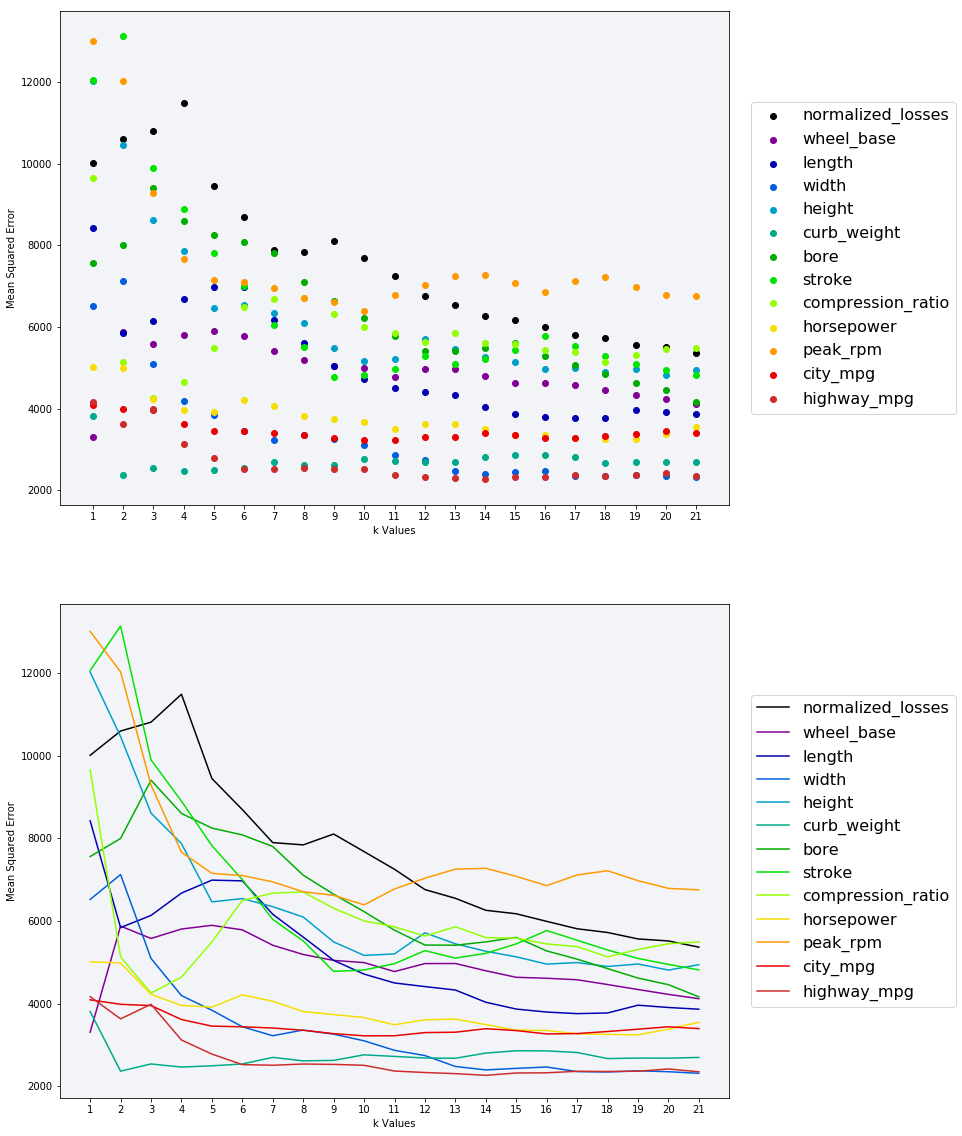

In [11]:
matplotlib.rc('legend', fontsize=16)
fig = plt.figure(figsize=(12,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1.6,21)))
ax2.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1.6,21)))

for i, feature in enumerate(test_features):
    ax1.scatter(x=k_values, y=rmse_dict[feature], label=feature)
    ax2.plot(k_values, rmse_dict[feature], label=feature)
    
ax1.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
ax1.set_xlabel('k Values')
ax1.set_ylabel('Mean Squared Error') 
ax1.set_xticks(k_values)
ax1.set_facecolor("#f2f4f7")

ax2.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
ax2.set_xlabel('k Values')
ax2.set_ylabel('Mean Squared Error') 
ax2.set_xticks(k_values)
ax2.set_facecolor("#f2f4f7")

plt.show()

## <font color=blue>04 Mulitvariate Model</font>
*  Modify the __knn_train_test()__ function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
  *  Instead of using just a single column for train and test, use all of the columns passed in.
  *  Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
*  Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
*  Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
*  Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
*  Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default __k__ value.
  *  *Note, I've decided to take this out to the best 8 training features.*
*  Display all of the RMSE values.

In [12]:
# Test knn_train_test() using all of the test features and a k value of 5
rmse = knn_train_test_Mulitvariate_Model(df=numeric_cars_normalized, train_columns=test_features, 
                    predict_column=predictive_feature, k_value=5)
print('All test features rmse:', rmse)

All test features rmse: 3116.75273373


In [13]:
# Rank the test features by mean mse values from the plots above
rmse_by_feature = pd.DataFrame(data=rmse_dict)
rmse_mean_by_feature = rmse_by_feature.mean()
rmse_mean_by_feature.sort_values(inplace=True)
print('\t-mean rmse rankings-')
rmse_mean_by_feature

	-mean rmse rankings-


highway_mpg          2669.201462
curb_weight          2717.126422
width                3346.691129
city_mpg             3449.845059
horsepower           3771.036743
wheel_base           4922.771468
length               5084.762585
compression_ratio    5815.033389
height               6257.991195
bore                 6373.415510
stroke               6545.805382
normalized_losses    7597.870540
peak_rpm             7621.733891
dtype: float64

In [14]:
# Just becasue I'm curious I'm going to get the min() RMSE for each feature
# I want to see how closely it coorelates to the ranking above
rmse_min_by_feature = rmse_by_feature.min()
rmse_min_by_feature.sort_values(inplace=True)
print('\t-min rmse rankings-')
rmse_min_by_feature

	-min rmse rankings-


highway_mpg          2263.956326
width                2313.414022
curb_weight          2365.314259
city_mpg             3220.669291
horsepower           3244.590305
wheel_base           3308.012319
length               3757.771477
bore                 4164.494998
compression_ratio    4255.456074
stroke               4779.864505
height               4812.267536
normalized_losses    5367.236491
peak_rpm             6390.887983
dtype: float64

#### Training Features Ranked By RMSE
The training features have been ranked both by mean() & min() RMSE values.  It is interesting to see that the top 5 five features are the same via both ranking methods.  The exact sequence of the top five varies a bit.  As a result the next step will be duplicated for both top 5 rankings.  The top 3 modles that yields the lowest RMSQ will be used in the next evaluation.

In [15]:
# Use the best 2, 3, ... 8 features from the mean ranking step to train and 
# test a multivariate k-nearest neighbors model using the default k value (5).
# Then display all of the RMSE values.

print('**Training Set Evalution using the min rankings**\n')

training_features_lst = []
RMSE = []
feature_count = []
for i, n in enumerate(range(2,9)):
    feature_count.append(n)
    training_features = rmse_min_by_feature.index[:n].tolist()
    training_features_lst.append(' - '.join(training_features))
    RMSE.append(knn_train_test_Mulitvariate_Model(df=numeric_cars_normalized, train_columns=training_features, 
                    predict_column=predictive_feature, k_value=5))
    
min_ranking_eval_set = pd.DataFrame({'feature_cnt': feature_count, 'features': training_features_lst, 'RMSE': RMSE})
min_ranking_eval_set.sort_values('RMSE', inplace=True)
min_ranking_eval_set

**Training Set Evalution using the min rankings**



,RMSE,feature_cnt,features
3,2111.971270,5,highway_mpg - width - curb_weight - city_mpg -...
5,2168.278086,7,highway_mpg - width - curb_weight - city_mpg -...
2,2387.680343,4,highway_mpg - width - curb_weight - city_mpg
6,2589.092501,8,highway_mpg - width - curb_weight - city_mpg -...
1,2677.704705,3,highway_mpg - width - curb_weight
4,2686.937684,6,highway_mpg - width - curb_weight - city_mpg -...
0,2831.602905,2,highway_mpg - width


In [16]:
# Use the best 2, 3, ... 8 features from the mean ranking step to train and 
# test a multivariate k-nearest neighbors model using the default k value (5).
# Then display all of the RMSE values.

print('**Training Set Evalution using the mean rankings**\n')
feature_count = []
training_features_lst = []
RMSE = []
for i, n in enumerate(range(2,9)):
    feature_count.append(n)
    training_features = rmse_mean_by_feature.index[:n].tolist()
    training_features_lst.append(' - '.join(training_features))
    RMSE.append(knn_train_test_Mulitvariate_Model(df=numeric_cars_normalized, train_columns=training_features, 
                    predict_column=predictive_feature, k_value=5))
    
mean_ranking_eval_set = pd.DataFrame({'feature_cnt': feature_count, 'features': training_features_lst, 'RMSE': RMSE})
mean_ranking_eval_set.sort_values('RMSE', inplace=True)
mean_ranking_eval_set

**Training Set Evalution using the mean rankings**



,RMSE,feature_cnt,features
3,2111.971270,5,highway_mpg - curb_weight - width - city_mpg -...
5,2168.278086,7,highway_mpg - curb_weight - width - city_mpg -...
2,2387.680343,4,highway_mpg - curb_weight - width - city_mpg
1,2677.704705,3,highway_mpg - curb_weight - width
4,2686.937684,6,highway_mpg - curb_weight - width - city_mpg -...
6,2867.916076,8,highway_mpg - curb_weight - width - city_mpg -...
0,3100.238248,2,highway_mpg - curb_weight


## <font color=blue>05 Hyperparameter Tuning</font>
*  For the top 3 models in the last step, vary the hyperparameter value from __1__ to __25__ and plot the resulting RMSE values.
*  Which __k__ value is optimal for each model? How different are the __k__ values and what do you think accounts for the differences?

In [17]:
# Optimize the hyperparameter (k) for the top 3 models

rmse_dict = {}

for n in range(3):
    feature_cnt = min_ranking_eval_set.iloc[n]['feature_cnt']
    features = rmse_min_by_feature.index[:feature_cnt].tolist()
    # instantiate mse list
    rmse = []
    
    for k_value in range(1,50):
        rmse.append(knn_train_test_Mulitvariate_Model(df=numeric_cars_normalized, train_columns=features, 
                    predict_column=predictive_feature, k_value=k_value))
        
    rmse_dict[min_ranking_eval_set.iloc[n]['features']] = rmse

In [18]:
rmse_by_feature = pd.DataFrame(data=rmse_dict)
rmse_by_feature['k_value'] = [x for x in range(1,50)]
rmse_by_feature.head(5)

,highway_mpg - width - curb_weight - city_mpg,highway_mpg - width - curb_weight - city_mpg - horsepower,highway_mpg - width - curb_weight - city_mpg - horsepower - wheel_base - length,k_value
0,3931.177516,3211.735444,4360.884465,1
1,2516.293721,2450.036975,2855.418142,2
2,2437.036419,2263.953969,2892.166093,3
3,2237.615381,2239.718046,2473.013703,4
4,2387.680343,2111.971270,2168.278086,5


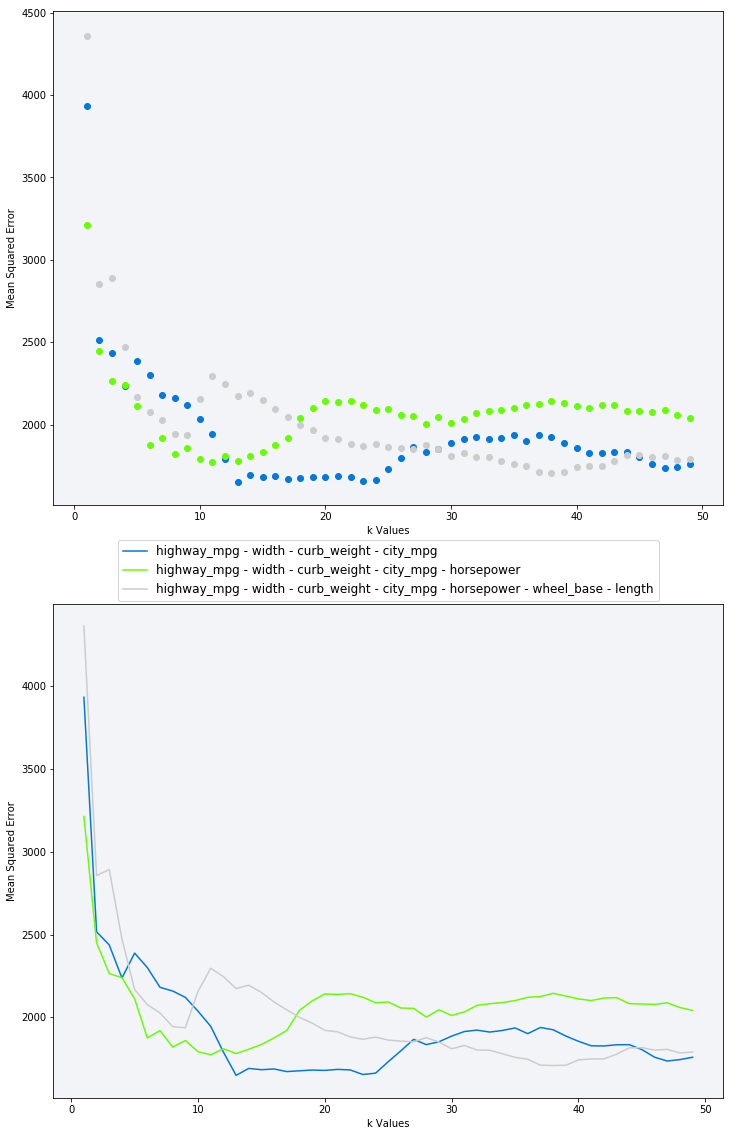

In [19]:
# Plot the k values versus RMSE to visualize which model works best 
# and at what k value

model_features = rmse_by_feature.columns.tolist()
model_features.remove('k_value')

matplotlib.rc('legend', fontsize=12)
fig = plt.figure(figsize=(12,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_prop_cycle('color',plt.cm.spectral(np.linspace(0.25,1.0,3)))
ax2.set_prop_cycle('color',plt.cm.spectral(np.linspace(0.25,1.0,3)))

for i, features in enumerate(model_features):
    ax1.scatter(x=rmse_by_feature['k_value'], y=rmse_by_feature[features], label=features)
    ax2.plot(rmse_by_feature['k_value'], rmse_by_feature[features], label=features)
    
ax1.set_xlabel('k Values')
ax1.set_ylabel('Mean Squared Error') 
ax1.set_facecolor("#f2f4f7")

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14))
ax2.set_xlabel('k Values')
ax2.set_ylabel('Mean Squared Error') 
ax2.set_facecolor("#f2f4f7")

plt.show()

In [20]:
# Display the optimal k values for each model

for features in model_features:
    k_at_RMSE_min = rmse_by_feature['k_value'][rmse_by_feature[features] == rmse_by_feature[features].min()]
    print('Model:', features)
    print('\tOptimal K value:', k_at_RMSE_min.values[0])
    print('\tMin RMSE:', rmse_by_feature[features].min())
    print('\n')

Model: highway_mpg - width - curb_weight - city_mpg
	Optimal K value: 13
	Min RMSE: 1650.31440777


Model: highway_mpg - width - curb_weight - city_mpg - horsepower
	Optimal K value: 11
	Min RMSE: 1774.38492409


Model: highway_mpg - width - curb_weight - city_mpg - horsepower - wheel_base - length
	Optimal K value: 38
	Min RMSE: 1709.5768035


